In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

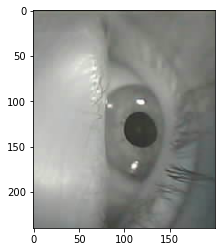

In [4]:
img = cv2.imread('../test.png',1)
img = img[:,50:250]
newImage = img.copy()
newImage1 = img.copy()
newImage2 = img.copy()
newImage3 = img.copy()
plt.imshow(img)

In [5]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])


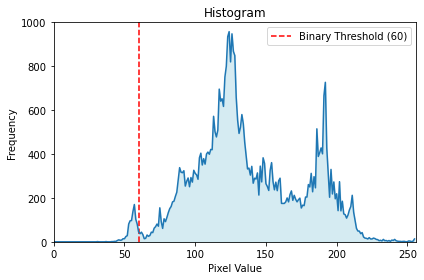

In [13]:
plt.figure()
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.axvline(60,color="red",linestyle="dashed")
plt.plot(hist)
plt.xlim([0, 256])
plt.ylim([0,1000])
plt.legend(["Binary Threshold (60)"])
plt.fill_between(range(len(hist)), hist.flatten(), color='lightblue', alpha=0.5)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Opening - Closing (Morph 3)')

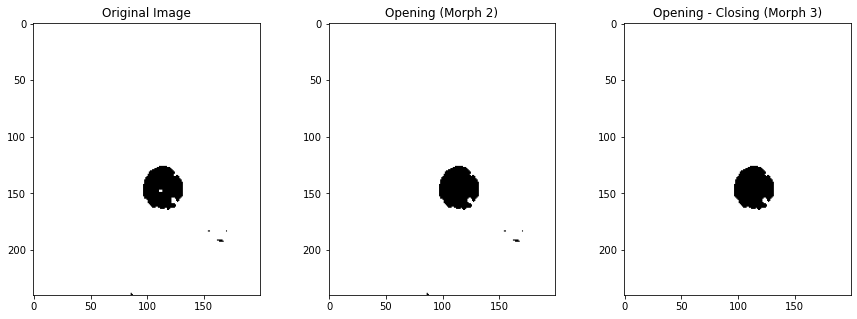

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(image_gray,(3,3),0)
ret,thresh1 = cv2.threshold(blur,60,255,cv2.THRESH_BINARY)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

fig = plt.figure(figsize=(15, 5))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(thresh1,cmap="gray")
plt.axis('on')
plt.title("Original Image")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(opening,cmap="gray")
plt.axis('on')
plt.title("Opening (Morph 2)")

fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(closing,cmap="gray")
plt.axis('on')
plt.title("Opening - Closing (Morph 3)")

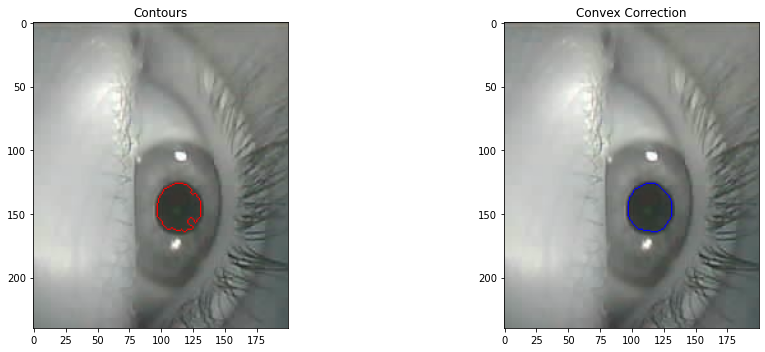

In [4]:
image = 255 - closing
contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
hull = []
for i in range(len(contours)):
    hull.append(cv2.convexHull(contours[i], False))
fig = plt.figure(figsize=(15, 5))
rows = 1
columns = 2    

fig.add_subplot(rows, columns, 1)
  
# showing image
cv2.drawContours(img, contours,-1, (255, 0, 0),1)
plt.imshow(img)
plt.axis('on')
plt.title("Contours")

fig.add_subplot(rows, columns, 2)
cv2.drawContours(newImage, hull,-1, (0, 0, 255),1)
plt.imshow(newImage)
plt.axis('on')
plt.title("Convex Correction")
plt.tight_layout()

In [6]:
largest_contour = max(contours, key=cv2.contourArea)
(x, y), radius = cv2.minEnclosingCircle(largest_contour)
center = (int(x), int(y))
area = cv2.contourArea(largest_contour)
print(area)

969.0


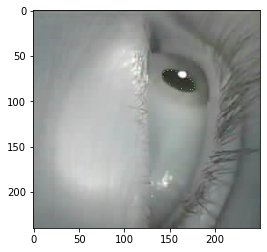

In [6]:
cnt = sorted(hull, key=cv2.contourArea)
maxcnt = cnt[-1]
cv2.drawContours(newImage1,maxcnt,-1, (0, 255, 0),1)
plt.imshow(newImage1)

In [7]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

In [12]:
cap = cv2.VideoCapture("http://192.168.1.100:81/stream")
ret,frame = cap.read()
r = cv2.selectROI("select the area", frame)
cv2.destroyAllWindows()



while True:
    # Display the image
    ret,frame = cap.read()
    #cv2.imshow('Video', frame)
    cropped_image = frame[int(r[1]):int(r[1]+r[3]), 
                      int(r[0]):int(r[0]+r[2])]
    
    cv2.imshow("cropped",cropped_image)


    # Wait for a key press
    key = cv2.waitKey(1) & 0xFF

    # Break the loop if 'q' is pressed
    if key == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [24]:
def detect_blinks(image):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshold_image = cv2.threshold(grayscale_image, 60, 255, cv2.THRESH_BINARY)[1]

    # Find the contours in the binary image.
    contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the largest contour, which is the eye.
    largest_contour = max(contours, key=cv2.contourArea)

    # Calculate the center of the eye.
    (x, y), radius = cv2.minEnclosingCircle(largest_contour)
    center = (int(x), int(y))

    # Calculate the area of the eye.
    area = cv2.contourArea(largest_contour)
    print(area)
    cv2.imshow("frame2",threshold_image)

    # Check if the eye is closed.
    if area < 60000:
        return True
    else:
        return False

In [25]:
cap = cv2.VideoCapture("../outpy.avi")

while True:
    ret,frame = cap.read()
    frame = frame[:,:250]

    if not ret:
        break
    
    # kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
    # image_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # blur = cv2.GaussianBlur(image_gray,(3,3),0)
    # ret,thresh1 = cv2.threshold(blur,65,255,cv2.THRESH_BINARY)
    # opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
    # closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    # image = 255 - closing
    # contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    # hull = []
    # for i in range(len(contours)):
    #     hull.append(cv2.convexHull(contours[i], False))
    
    # cv2.drawContours(frame, hull,-1, (0, 0, 255),1)

    is_blink = detect_blinks(frame)
    
    if is_blink:
        cv2.putText(frame,"Blink", (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    cv2.imshow("Video",frame)
    
    

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

59511.0
59510.0
59510.0
59511.0
59511.0
59511.0
59510.0
59511.0
59507.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59511.0
59499.0
59504.5
59495.5
59502.0
59495.5
59496.0
59510.0
59503.0
59459.0
59400.0
59349.5
59347.0
59422.5
59262.0
59266.5
59207.0
59316.0
59211.5
59360.0
59387.0
59396.5
59510.0
59503.0
59511.0
59511.0
59511.0


((50.52571487426758, 74.02251434326172), (39.92489242553711, 44.48220443725586), 85.62035369873047)


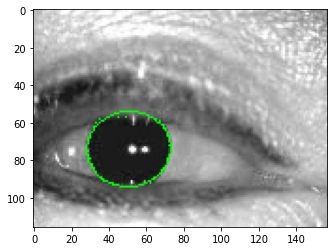

In [78]:
ellipse = cv2.fitEllipse(maxcnt)
im = cv2.ellipse(newImage1,ellipse,(0,255,0),1)
print(ellipse)
plt.imshow(im)

In [79]:
print(ellipse[0])

(50.52571487426758, 74.02251434326172)


In [80]:
def fit_rotated_ellipse_ransac(data,iter=30,sample_num=10,offset=80.0):

	count_max = 0
	effective_sample = None

	for i in range(iter):
		sample = np.random.choice(len(data), sample_num, replace=False)

		xs = data[sample][:,0].reshape(-1,1)
		ys = data[sample][:,1].reshape(-1,1)

		J = np.mat( np.hstack((xs*ys,ys**2,xs, ys, np.ones_like(xs,dtype=np.float))) )
		Y = np.mat(-1*xs**2)
		P= (J.T * J).I * J.T * Y

		# fitter a*x**2 + b*x*y + c*y**2 + d*x + e*y + f = 0
		a = 1.0; b= P[0,0]; c= P[1,0]; d = P[2,0]; e= P[3,0]; f=P[4,0];
		ellipse_model = lambda x,y : a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

		# threshold 
		ran_sample = np.array([[x,y] for (x,y) in data if np.abs(ellipse_model(x,y)) < offset ])

		if(len(ran_sample) > count_max):
			count_max = len(ran_sample) 
			effective_sample = ran_sample

	return fit_rotated_ellipse(effective_sample)


def fit_rotated_ellipse(data):

	xs = data[:,0].reshape(-1,1) 
	ys = data[:,1].reshape(-1,1)

	J = np.mat( np.hstack((xs*ys,ys**2,xs, ys, np.ones_like(xs,dtype=np.float))) )
	Y = np.mat(-1*xs**2)
	P= (J.T * J).I * J.T * Y

	a = 1.0; b= P[0,0]; c= P[1,0]; d = P[2,0]; e= P[3,0]; f=P[4,0];
	theta = 0.5* np.arctan(b/(a-c))  
	
	cx = (2*c*d - b*e)/(b**2-4*a*c)
	cy = (2*a*e - b*d)/(b**2-4*a*c)

	cu = a*cx**2 + b*cx*cy + c*cy**2 -f
	w= np.sqrt(cu/(a*np.cos(theta)**2 + b* np.cos(theta)*np.sin(theta) + c*np.sin(theta)**2))
	h= np.sqrt(cu/(a*np.sin(theta)**2 - b* np.cos(theta)*np.sin(theta) + c*np.cos(theta)**2))

	ellipse_model = lambda x,y : a*x**2 + b*x*y + c*y**2 + d*x + e*y + f

	error_sum = np.sum([ellipse_model(x,y) for x,y in data])
	print('fitting error = %.3f' % (error_sum))

	return (cx,cy,w,h,theta)

fitting error = 0.000
50.53328717475715 72.81927633363263
fitting error = 0.000


Text(0.5, 1.0, 'Ellipse Fitting')

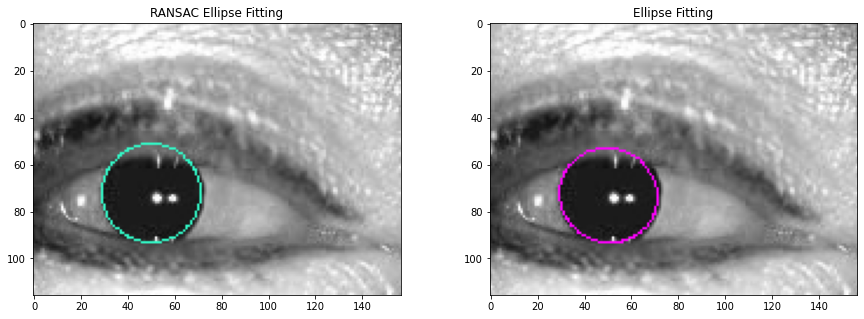

In [81]:
cx,cy,w,h,theta = fit_rotated_ellipse_ransac(maxcnt.reshape(-1,2))
print(cx,cy)
cx1,cy1,w1,h1,theta1 = fit_rotated_ellipse(maxcnt.reshape(-1,2))

fig = plt.figure(figsize=(15, 5))
rows = 1
columns = 2    

fig.add_subplot(rows, columns, 1)
  
# showing image
cv2.ellipse(newImage2,(int(cx),int(cy)),(int(w),int(h)),theta*180.0/np.pi,0.0,360.0,(50,250,200),1)
plt.imshow(newImage2)
plt.axis('on')
plt.title("RANSAC Ellipse Fitting")

fig.add_subplot(rows, columns, 2)
cv2.ellipse(newImage3,(int(cx1),int(cy1)),(int(w1),int(h1)),theta*180.0/np.pi,0.0,360.0,(255,0,255),1)
plt.imshow(newImage3)
plt.axis('on')
plt.title("Ellipse Fitting")